<a href="https://colab.research.google.com/github/gokul6868/-Cracking-the-marketing/blob/main/STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**UPLOAD DATASET**

**DATA CLEANING**

**CHECK NULL**

In [ ]:
# Check for null values in each column
print("Null values per column:\n")
print(df.isnull().sum())

# Check if any null values exist in the whole DataFrame
print("\nAny nulls in dataset?", df.isnull().values.any())

Null values per column:

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Any nulls in dataset? False


**DESCRIBE**

In [ ]:
# Get descriptive statistics for all columns, including non-numerical ones
description_all = df.describe(include='all')

# Display the summary statistics
print(description_all)

              Date          Open          High           Low         Close  \
count        10468  10468.000000  10468.000000  10468.000000  10468.000000   
unique       10468           NaN           NaN           NaN           NaN   
top     2022-06-17           NaN           NaN           NaN           NaN   
freq             1           NaN           NaN           NaN           NaN   
mean           NaN     14.757987     14.921491     14.594484     14.763533   
std            NaN     31.914174     32.289158     31.543959     31.929489   
min            NaN      0.049665      0.049665      0.049107      0.049107   
25%            NaN      0.283482      0.289286      0.276786      0.283482   
50%            NaN      0.474107      0.482768      0.465960      0.475446   
75%            NaN     14.953303     15.057143     14.692589     14.901964   
max            NaN    182.630005    182.940002    179.119995    182.009995   

           Adj Close        Volume  
count   10468.000000  1.04

**CHECK DUPLICATE**

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, display the duplicate rows themselves
print("\nDuplicate rows:\n")
print(duplicate_rows)

Number of duplicate rows: 0

Duplicate rows:

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


**DROP DUPLICATE**

In [ ]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()

# Confirm removal
print(f"\nNew shape after removing duplicates: {df.shape}")


New shape after removing duplicates: (10468, 7)


**REMOVE WHITESPACE**

In [ ]:
#Remove leading/trailing whitespace in string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

**ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder in case you want to decode later

**ONE-HOT ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder in case you want to decode later

**VISUALIZATION**

**1.CORRELATION HEATMAP**

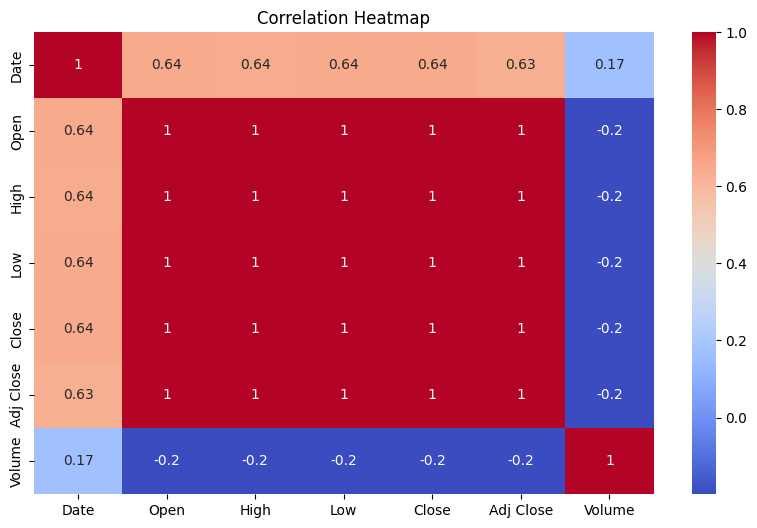

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**2.PLOT**

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


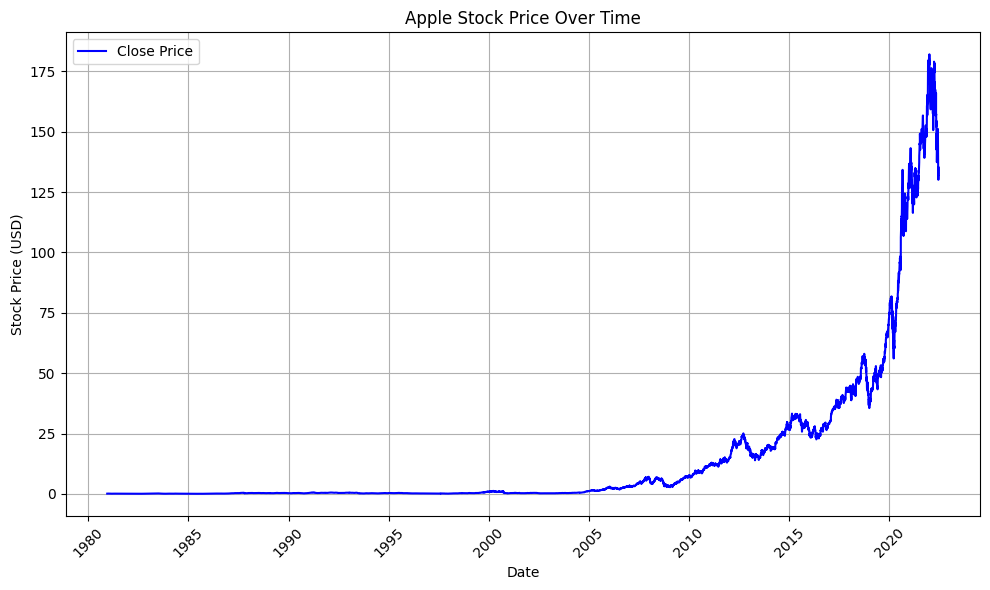

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the AAPL dataset
df = pd.read_csv('AAPL.csv')

# Display the first few rows of the data to understand its structure
print(df.head())

# Check the columns to see if there's a 'Date' or 'Close' column for visualization
print(df.columns)

# Convert 'Date' column to datetime type if present
df['Date'] = pd.to_datetime(df['Date'])

# Plot: Apple's stock closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**MODEL BUILDING AND EVALUATION**

<ipython-input-28-956ccd60d5e9>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Mean Absolute Error (MAE): 0.09989866528793948
Mean Squared Error (MSE): 0.05584403531904748
Root Mean Squared Error (RMSE): 0.2363134260236762
R-squared (R²): 0.9999401671405863


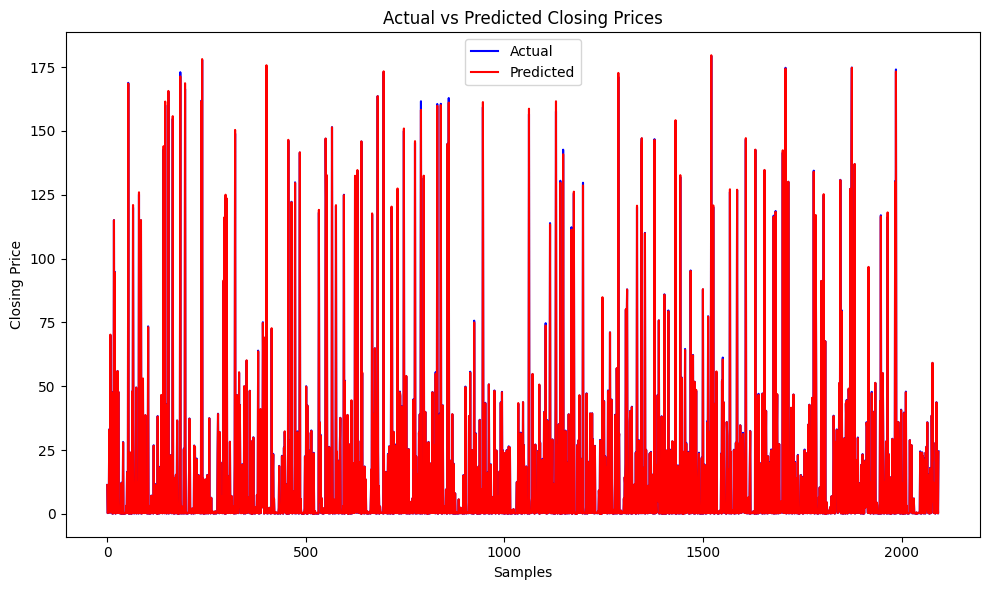

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load data
df = pd.read_csv('AAPL.csv')

# Step 3: Preprocess
df['Date'] = pd.to_datetime(df['Date'])  # if 'Date' exists
df = df.sort_values('Date')  # Ensure time order

# Drop 'Date' column for modeling, keep numeric columns
df = df.drop(columns=['Date'])

# Handle missing values if any
df = df.fillna(method='ffill')

# Step 4: Define features and target
# Use all columns except 'Close' as features (X), 'Close' as target (y)
X = df.drop('Close', axis=1)
y = df['Close']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Prediction
y_pred = model.predict(X_test)

# Step 8: Evaluation
# Step 8: Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
# Calculate RMSE manually if squared parameter is not available
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))
# Step 9: Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

**DEPLOYMENT**

<ipython-input-29-956ccd60d5e9>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Mean Absolute Error (MAE): 0.09989866528793948
Mean Squared Error (MSE): 0.05584403531904748
Root Mean Squared Error (RMSE): 0.2363134260236762
R-squared (R²): 0.9999401671405863


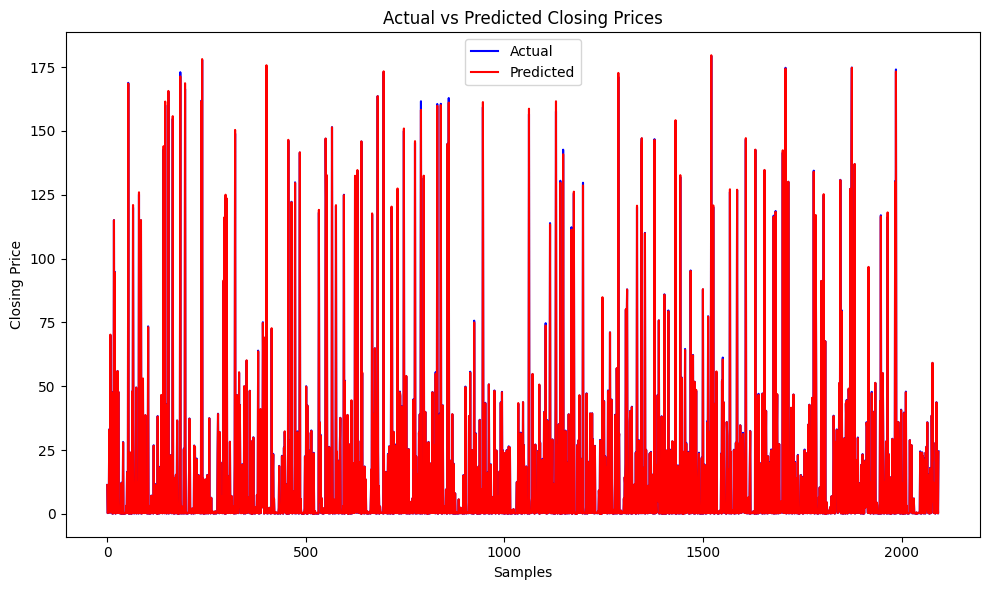

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load data
df = pd.read_csv('AAPL.csv')

# Step 3: Preprocess
df['Date'] = pd.to_datetime(df['Date'])  # if 'Date' exists
df = df.sort_values('Date')  # Ensure time order

# Drop 'Date' column for modeling, keep numeric columns
df = df.drop(columns=['Date'])

# Handle missing values if any
df = df.fillna(method='ffill')

# Step 4: Define features and target
# Use all columns except 'Close' as features (X), 'Close' as target (y)
X = df.drop('Close', axis=1)
y = df['Close']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Prediction
y_pred = model.predict(X_test)

# Step 8: Evaluation
# Step 8: Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
# Calculate RMSE manually if squared parameter is not available
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R²):", r2_score(y_test, y_pred))
# Step 9: Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()